In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [2]:
eng_eval = pd.read_csv("evaluationCN_complete.csv")
chin_eval = pd.read_csv("evaluationEN_complete.csv")

eng_chin_eval = pd.read_csv("evaluation_chin_eng.csv")

eng_food_groups = pd.read_csv("aggregated_food_scores_GB.csv")
chin_food_groups = pd.read_csv("aggregated_food_scores_CN.csv")

high_low = pd.read_csv('highest_lowest_food_group_means_GB_CN.csv')

In [3]:
#colors = sns.color_palette("husl", 8)

#sns.boxplot(x="food_group", y="happy",
#            hue="country", data=h_max)

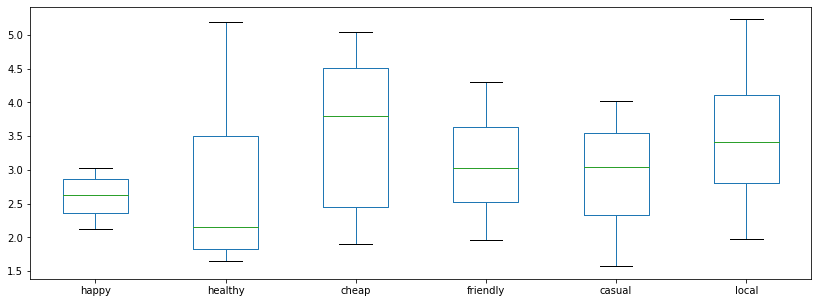

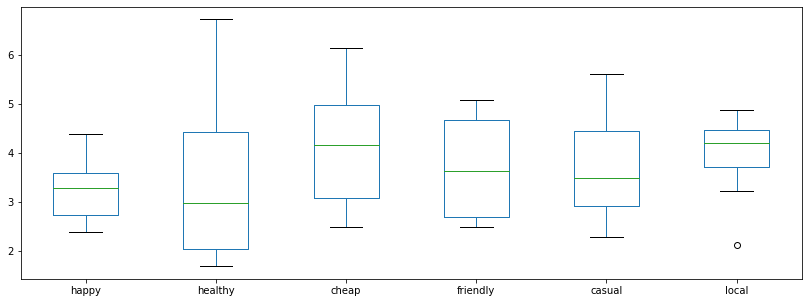

In [4]:
chin_food = chin_food_groups.groupby(by =['food_group']).mean().reset_index()
eng_food = eng_food_groups.groupby(by =['food_group']).mean().reset_index()


eng_food.plot(kind="box", figsize=(14, 5))

chin_food.plot(kind="box", figsize=(14, 5))

(0, 9)

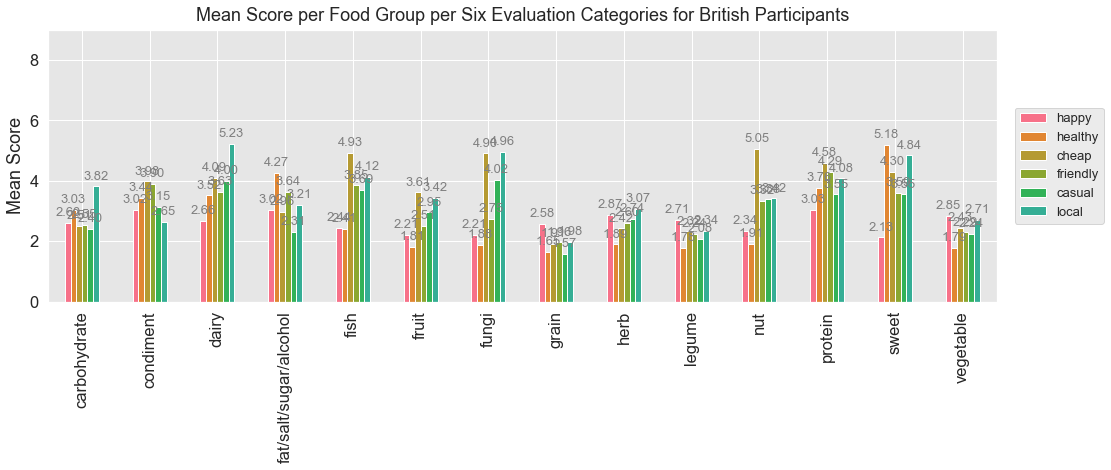

In [5]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

colors = sns.color_palette("husl", 11)

ax = eng_food.plot(x="food_group", y=["happy", "healthy", "cheap", 
                                 "friendly", 'casual', 'local'], kind="bar",
                                 figsize=(17, 5), color=colors)

#plt.xticks(rotation=55, horizontalalignment='right')
ax.legend(loc='right', bbox_to_anchor=(1.12, 0.5), fontsize=13, frameon = 1)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize = 13, color='gray')

plt.title('Mean Score per Food Group per Six Evaluation Categories for British Participants', y= 1.01)
plt.ylabel('Mean Score')
plt.xlabel('')

plt.ylim([0, 9])

(0, 9)

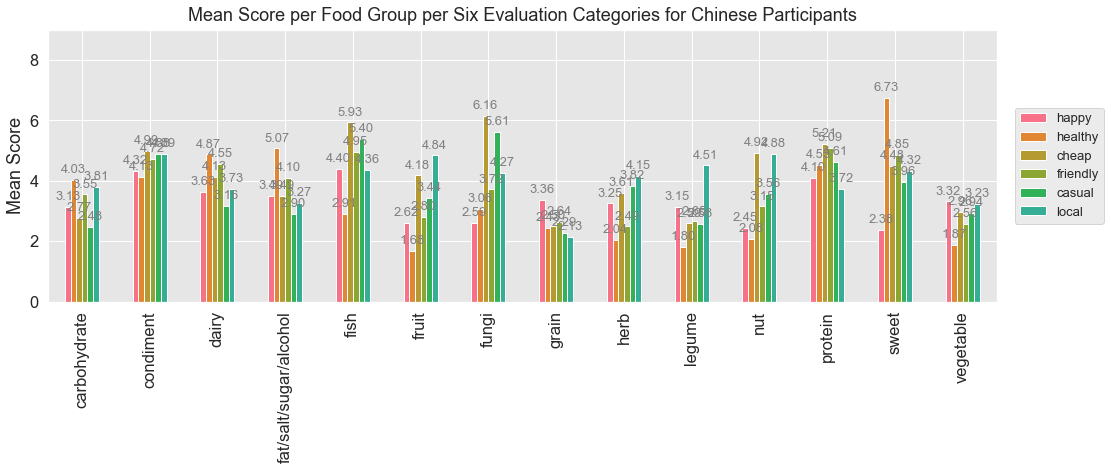

In [6]:
colors = sns.color_palette("husl", 11)

ax = chin_food.plot(x="food_group", y=["happy", "healthy", "cheap", 
                                 "friendly", 'casual', 'local'], kind="bar",
                                 figsize=(17, 5), color=colors)

#plt.xticks(rotation=55, horizontalalignment='right')
ax.legend(loc='right', bbox_to_anchor=(1.12, 0.5), fontsize=13, frameon = 1)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize = 13, color='gray')

plt.title('Mean Score per Food Group per Six Evaluation Categories for Chinese Participants', y= 1.01)
plt.ylabel('Mean Score')
plt.xlabel('')

plt.ylim([0, 9])

In [7]:
eng_eval = eng_eval.replace(-9, np.NaN).replace(' chicory', 'chicory').replace(' hake', 'hake').replace(' rasberry', 'rasberry')
chin_eval = chin_eval.replace(-9, np.NaN).replace(' chicory', 'chicory').replace(' hake', 'hake').replace(' rasberry', 'rasberry')

eng_chin_eval_group_by_food_name = eng_chin_eval.groupby(by = ['food_name', 'country']).mean().reset_index().replace(-9, np.NaN)

eng_chin_eval_group_by_food_name = eng_chin_eval_group_by_food_name.drop(columns=['location_1', 'location_2', 'familiarity'])

In [8]:
#sns.pairplot(eng_chin_eval_group_by_food_name, hue = 'country', height=5, kind="reg")

In [9]:
chin_group_by_food_name = chin_eval.groupby(by = ['food_name'])
chin_food_name_avg = chin_group_by_food_name.mean()#.reset_index()

eng_group_by_food_name = eng_eval.groupby(by = ['food_name'])
eng_food_name_avg = eng_group_by_food_name.mean()#.reset_index()

#chin_food_name_avg.to_csv('aggregated_food_scores_CN.csv')
#eng_food_name_avg.to_csv('aggregated_food_scores_GB.csv')
#chin_food_name_avg
#eng_food_name_avg
norms = [norm for norm in eng_food_name_avg.index]

[Text(0, 0.5, 'happy_sad'),
 Text(0, 1.5, 'healthy_unhealthy'),
 Text(0, 2.5, 'cheap_expensive'),
 Text(0, 3.5, 'environ_friendly'),
 Text(0, 4.5, 'casual_posh'),
 Text(0, 5.5, 'local_foreign'),
 Text(0, 6.5, 'location_1')]

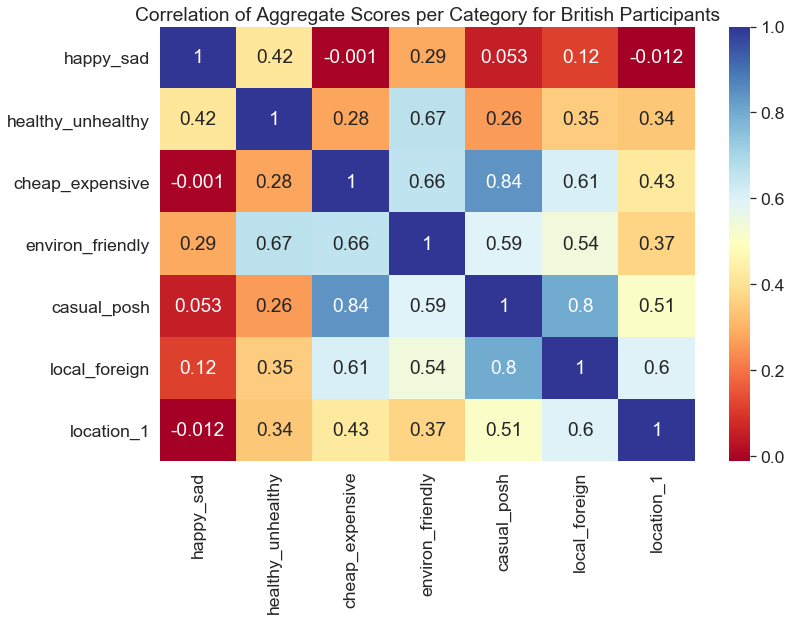

In [10]:
sns.set_context("notebook", font_scale=1.6,
                rc={"lines.linewidth": 2.5})

eng_food_name_avg = eng_food_name_avg.drop(columns=['food_id', 'time_cost', 'familiarity', 'location_2'])

#eng_food_name_avg = eng_food_name_avg.rename(columns={"happy_sad": "happy", "healthy_unhealthy": "healthy", 
#                                                        "cheap_expensive": "cheap", "environ_friendly": "friendly", 
#                                                        "casual_posh": "casual", "local_foreign":"local", 
#                                                        "location_1": "location"})

plt.figure(figsize=(12, 8))

ax = plt.axes()
ax_eng_food_name_avg = sns.heatmap(eng_food_name_avg.corr(method="spearman"), annot=True, cmap = 'RdYlBu', ax=ax)

ax.set_title("Correlation of Aggregate Scores per Category for British Participants", y=1.2)
ax_eng_food_name_avg.set_yticklabels(labels = eng_food_name_avg.columns, rotation = 0)

[Text(0, 0.5, 'happy_sad'),
 Text(0, 1.5, 'healthy_unhealthy'),
 Text(0, 2.5, 'cheap_expensive'),
 Text(0, 3.5, 'environ_friendly'),
 Text(0, 4.5, 'casual_posh'),
 Text(0, 5.5, 'local_foreign'),
 Text(0, 6.5, 'location_1')]

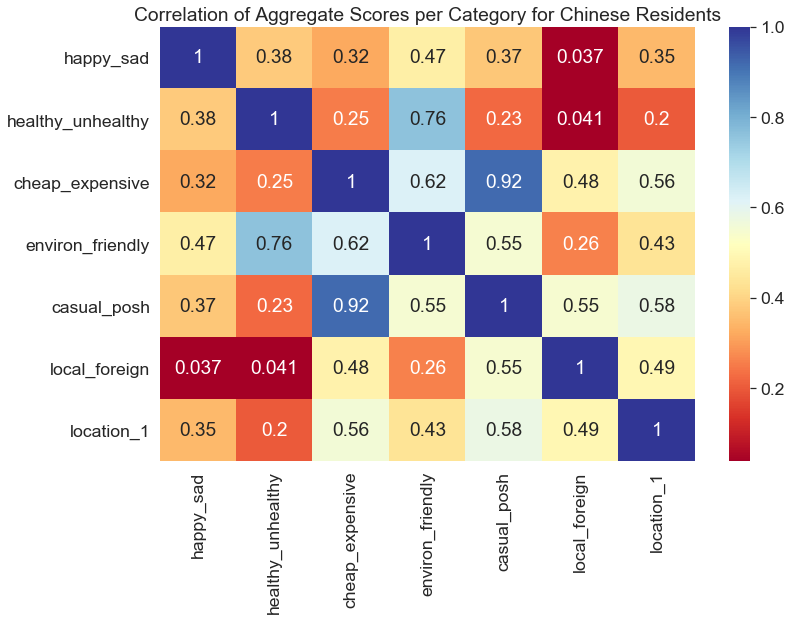

In [11]:
chin_food_name_avg = chin_food_name_avg.drop(columns=['food_id', 'time_cost', 'familarity', 'location_2'])
#chin_food_name_avg = chin_food_name_avg.rename(columns={"happy_sad": "happy", "healthy_unhealthy": "healthy", 
#                                                        "cheap_expensive": "cheap", "environ_friendly": "friendly", 
#                                                        "casual_posh": "casual", "local_foreign":"local",
#                                                        "location_1": "location"})

plt.figure(figsize=(12, 8))

ax_chin_food_name_avg = sns.heatmap(chin_food_name_avg.corr(method="spearman"), annot=True, cmap = 'RdYlBu')
plt.title("Correlation of Aggregate Scores per Category for Chinese Residents", y=1.1)
ax_chin_food_name_avg.set_yticklabels(labels = chin_food_name_avg.columns, rotation = 0)

'Need to be able to see top 10 and bottom 10 most correlated norms'

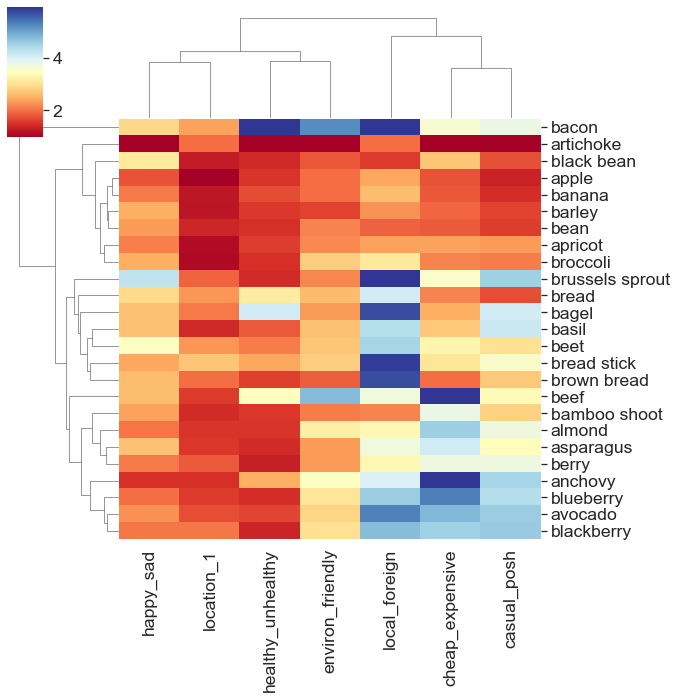

In [12]:
#w2v_wiki = np.argsort(word2vec_wiki.values)

eng_map = sns.clustermap(eng_food_name_avg.head(25), cmap="RdYlBu", robust=True, yticklabels=1)
ax = eng_map.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")


#plt.title("Top 20 Food Norm Correlation to Category fo British Participants", y=2.1)

"""Need to be able to see top 10 and bottom 10 most correlated norms"""

Text(786.9999999999999, 0.5, '')

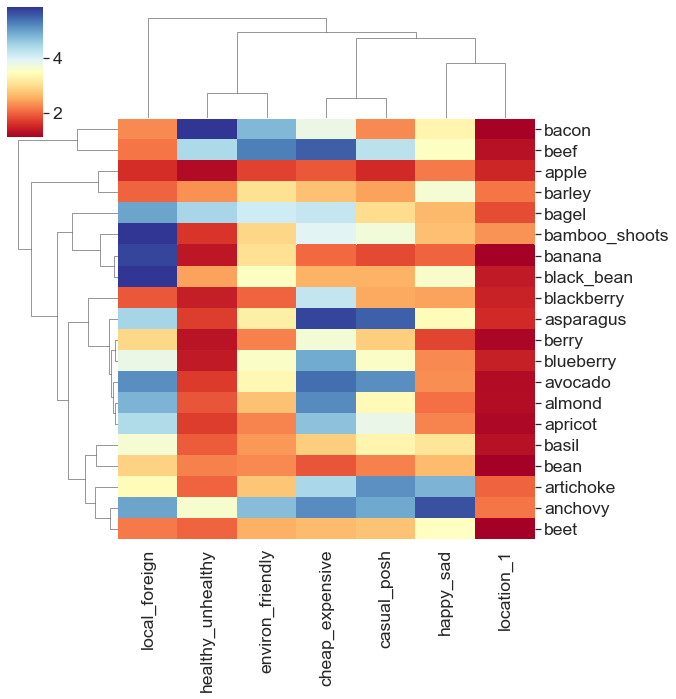

In [13]:
chin_map = sns.clustermap(chin_food_name_avg.head(20), metric="correlation", cmap="RdYlBu", robust=True, yticklabels=1)
ax = chin_map.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")
#plt.title("Top 20 Food Norm Correlation to Category fo Chinese Participants", y=2.1)

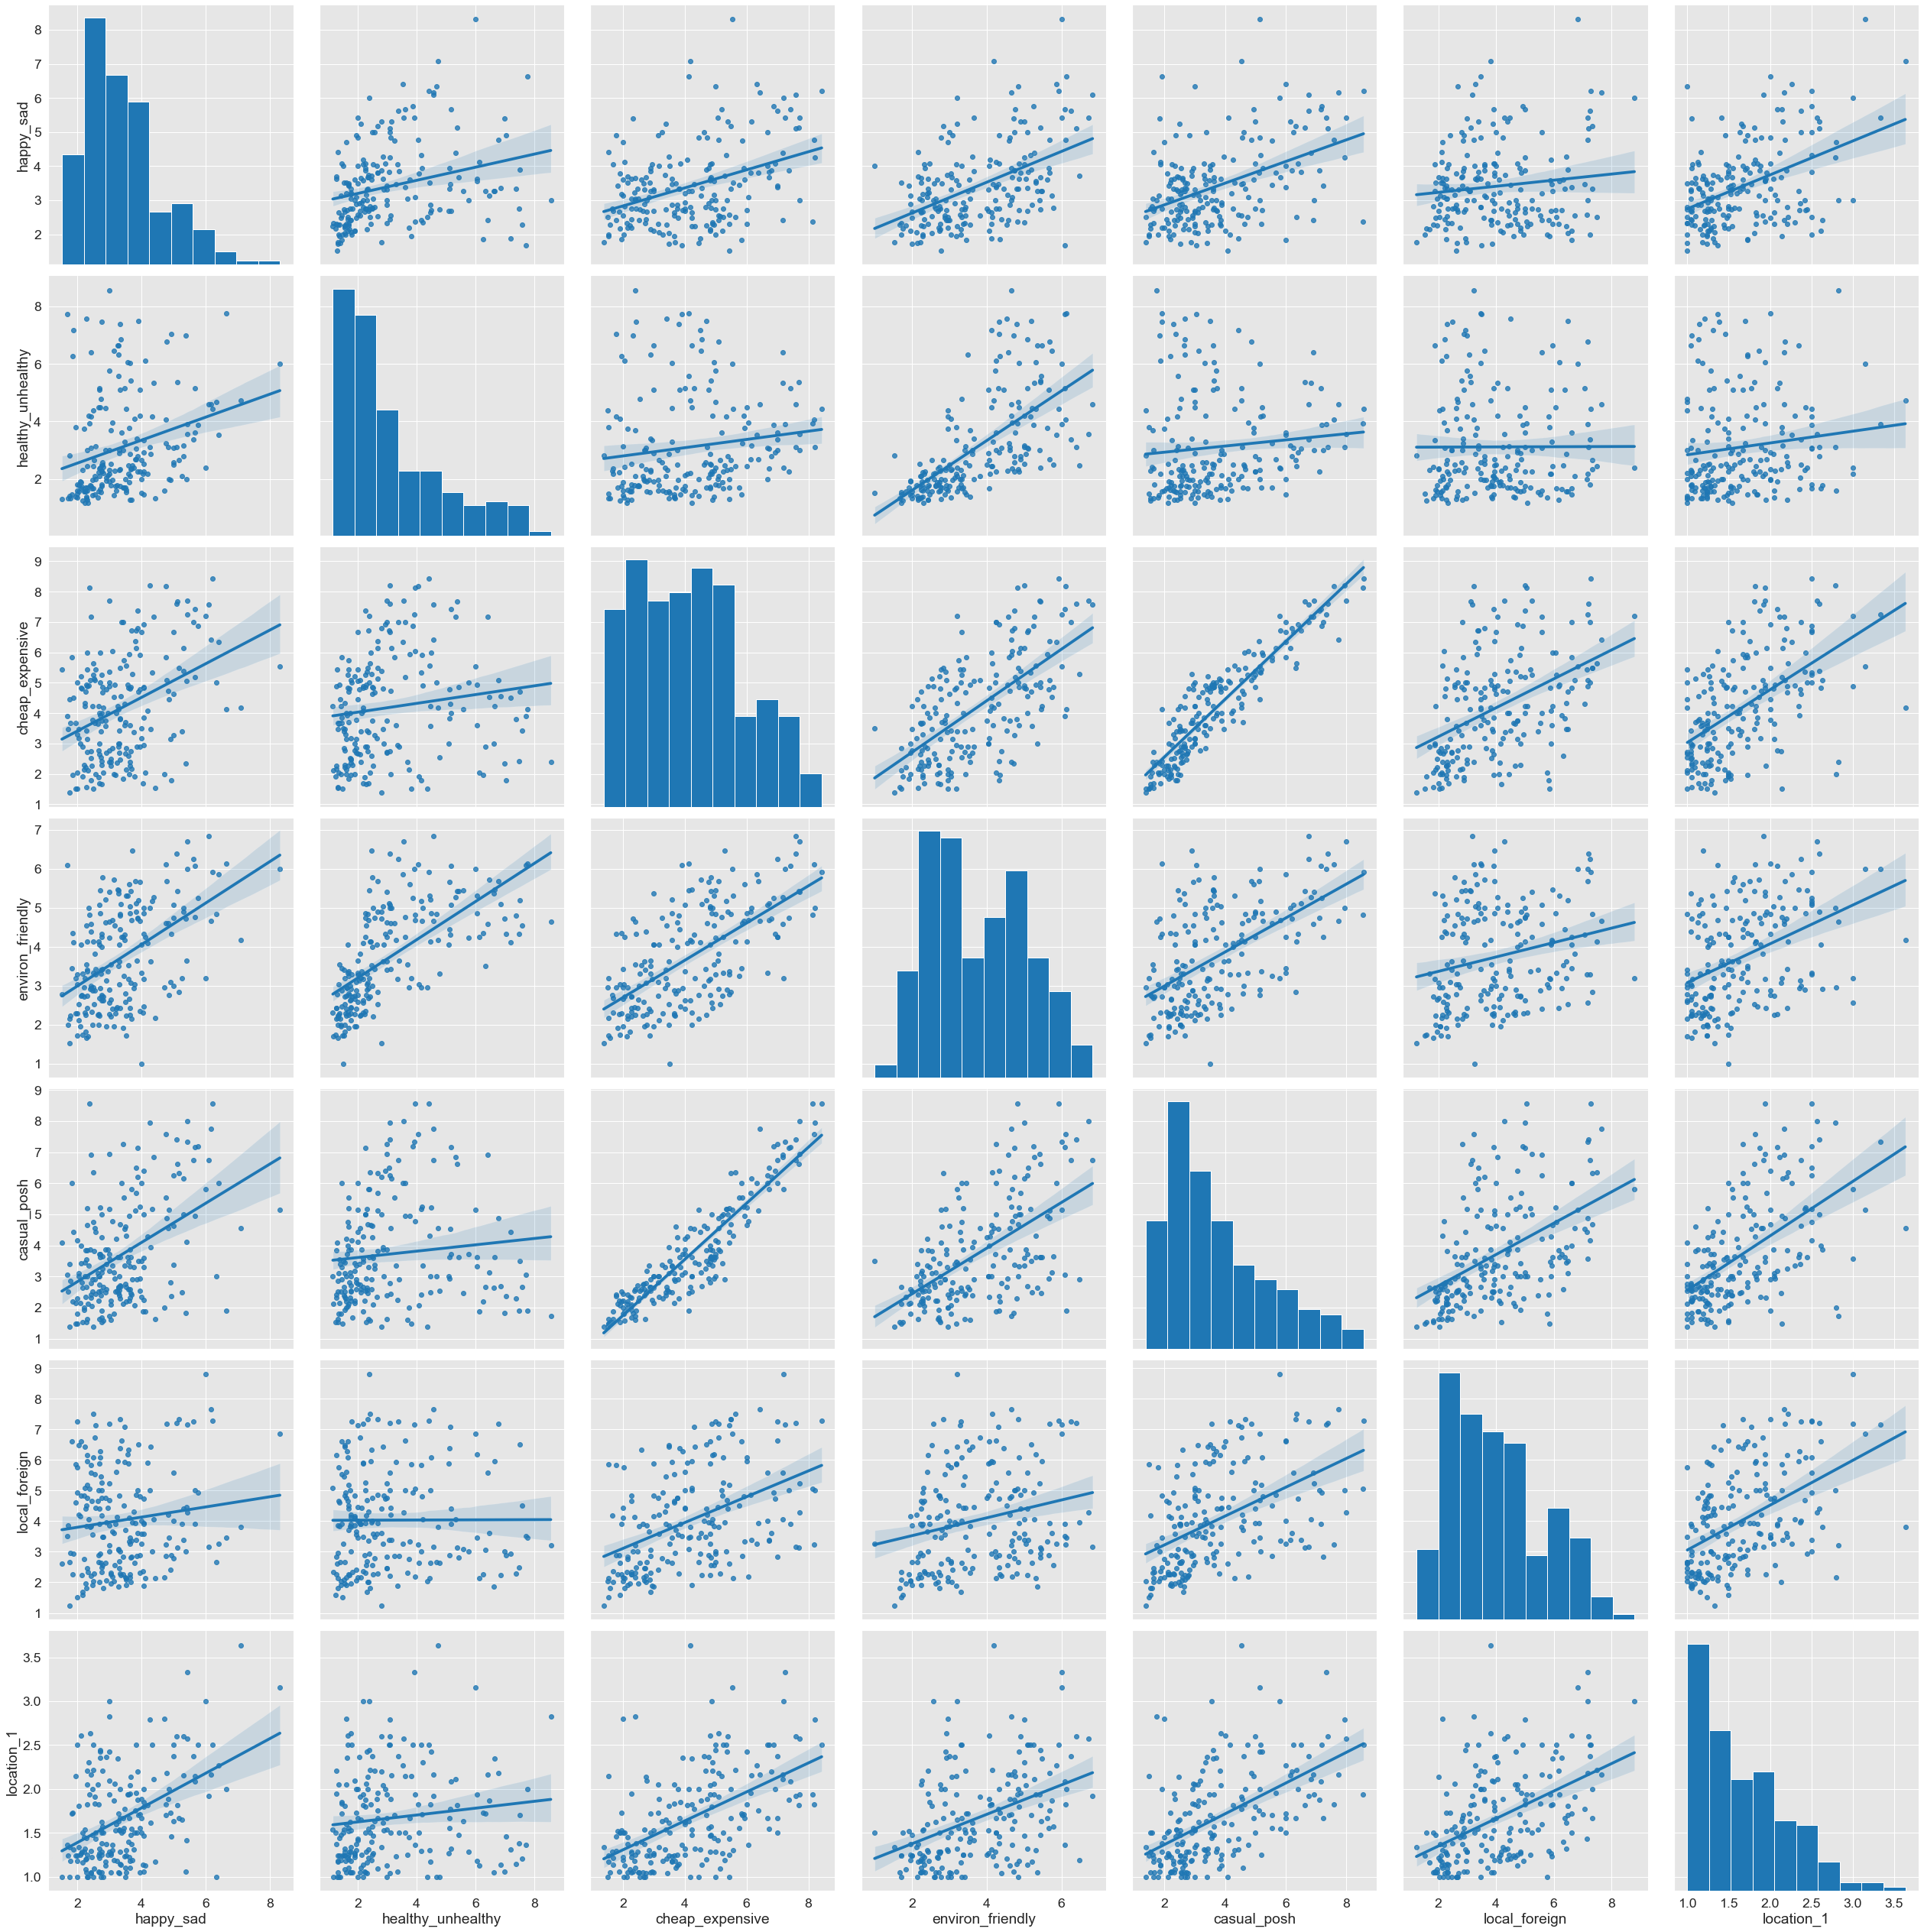

In [14]:
ax_chin_food_name_reg_pairplot = sns.pairplot(chin_food_name_avg, height=5, kind="reg")

In [15]:
#ax_eng_food_name_reg_pairplot = sns.pairplot(eng_food_name_avg, height=5, kind="reg")
eng_food_name_avg['happy_sad']

food_name
almond         2.052632
anchovy        1.500000
apple          1.782609
apricot        2.133333
artichoke      1.000000
                 ...   
wheat          2.666667
white bread    3.444444
whitefish      2.714286
yogurt         2.500000
zucchini       1.875000
Name: happy_sad, Length: 200, dtype: float64

(0.0, 1.0)

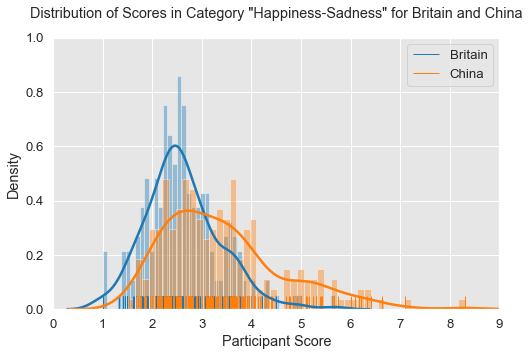

In [16]:
sns.set_context("notebook", font_scale=1.2,
                rc={"lines.linewidth": 2.5})

plt.figure(figsize=(8, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['happy_sad'], bins=50, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['happy_sad'], bins=50, kde=True, rug=True)
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Distribution of Scores in Category \"Happiness-Sadness\" for Britain and China", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')


plt.xlim([0, 9])
plt.ylim([0.0, 1.0])

# 1 = happy, 9 = sad

(0.0, 1.0)

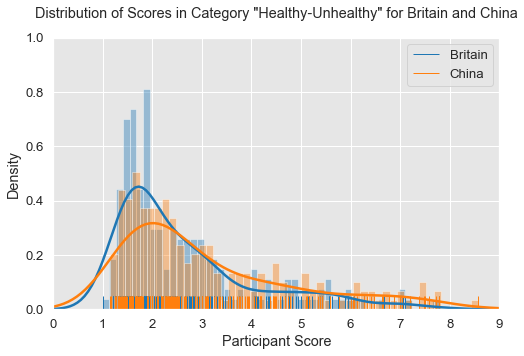

In [17]:
plt.figure(figsize=(8, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['healthy_unhealthy'], bins=50, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['healthy_unhealthy'], bins=50, kde=True, rug=True)
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Distribution of Scores in Category \"Healthy-Unhealthy\" for Britain and China", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')

plt.xlim([0, 9])
plt.ylim([0.0, 1.0])

# 1 = healthy, 9 = unhealthy

(0.0, 1.0)

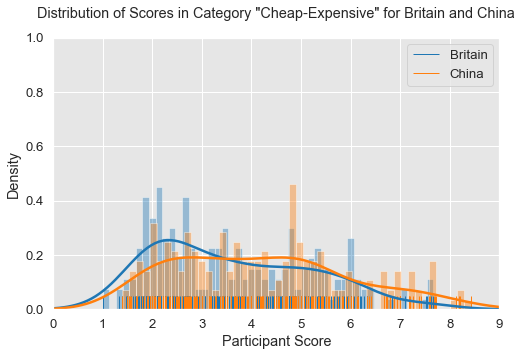

In [18]:
plt.figure(figsize=(8, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['cheap_expensive'], bins=50, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['cheap_expensive'], bins=50, kde=True, rug=True)
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Distribution of Scores in Category \"Cheap-Expensive\" for Britain and China", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')

plt.xlim([0, 9])
plt.ylim([0.0, 1.0])

# 1= environmentally friendly, 9 = environmentally unfriendly

(0.0, 1.0)

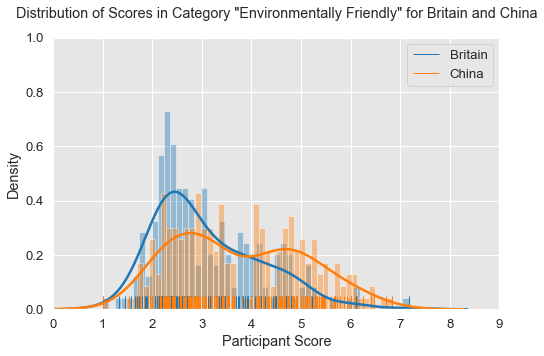

In [19]:
plt.figure(figsize=(8, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['environ_friendly'], bins=50, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['environ_friendly'], bins=50, kde=True, rug=True)
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Distribution of Scores in Category \"Environmentally Friendly\" for Britain and China", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')

plt.xlim([0, 9])
plt.ylim([0.0, 1.0])

# 1= environmentally friendly, 9 = environmentally unfriendly

(0.0, 1.0)

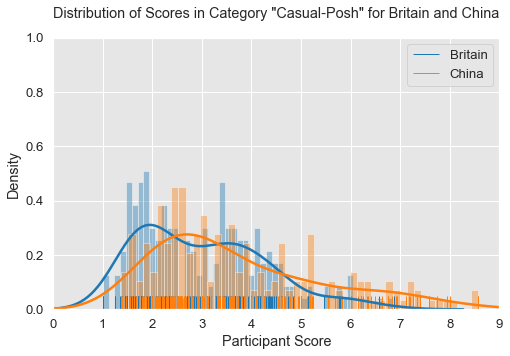

In [20]:
plt.figure(figsize=(8, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['casual_posh'], bins=50, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['casual_posh'], bins=50, kde=True, rug=True)
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Distribution of Scores in Category \"Casual-Posh\" for Britain and China", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')

plt.xlim([0, 9])

plt.ylim([0.0, 1.0])

# 1 = casual, 9 = posh

(0.0, 1.0)

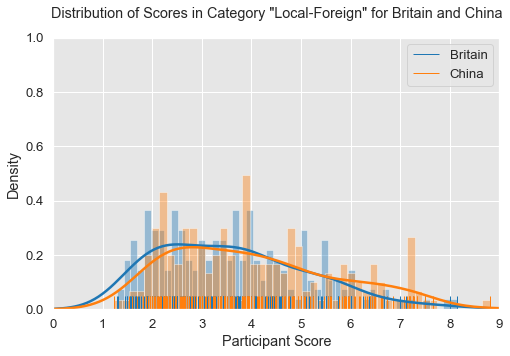

In [21]:
plt.figure(figsize=(8, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['local_foreign'], bins=50, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['local_foreign'], bins=50, kde=True, rug=True)
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Distribution of Scores in Category \"Local-Foreign\" for Britain and China", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')

plt.xlim([0, 9])
plt.ylim([0.0, 1.0])

# 1 = local traditional, 9 = foreign not traditional

(0, 5.0)

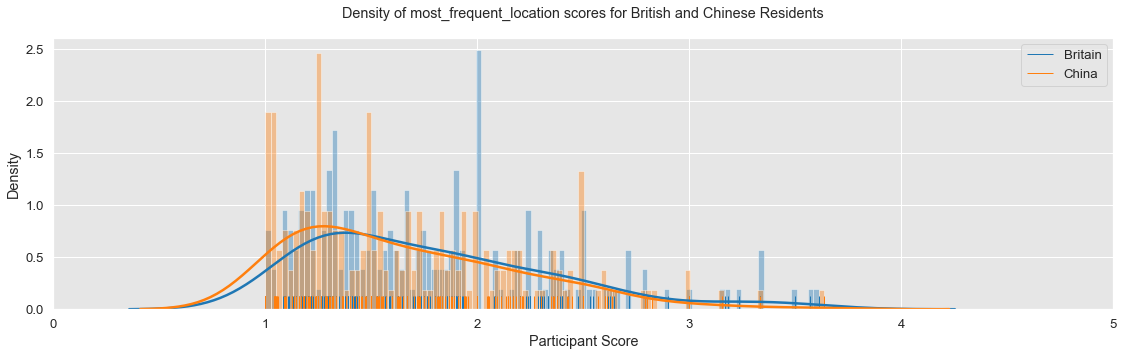

In [22]:
plt.figure(figsize=(19, 5))

ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['location_1'], bins=100, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['location_1'], bins=100, kde=True, rug=True)

ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_kdeplot.set_title("Density of most_frequent_location scores for British and Chinese Residents", y=1.05)
ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')

plt.xlim([0, 5.0])
#plt.ylim([0.0, 1.2])

# 1 = 

(0, 5.0)

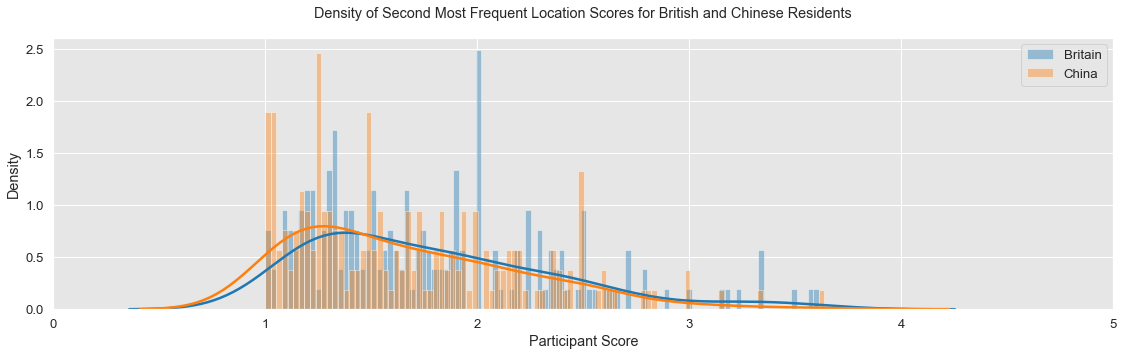

In [38]:
plt.figure(figsize=(19, 5))


ax_eng_food_name_avg_kdeplot = sns.distplot(eng_food_name_avg['location_1'], bins=100)

ax_chin_food_name_avg_kdeplot = sns.distplot(chin_food_name_avg['location_1'], bins=100) #result[result['Value'] > 10] 
ax_chin_food_name_avg_kdeplot.legend(labels=['Britain','China'])

ax_chin_food_name_avg_kdeplot.set_title("Density of Second Most Frequent Location Scores for British and Chinese Residents", y=1.05)

ax_chin_food_name_avg_kdeplot.set_ylabel('Density')
ax_chin_food_name_avg_kdeplot.set_xlabel('Participant Score')
#ax_chin_food_name_avg_kdeplot.set_yticklabels(['Home', 'Restaurant', 'Bar', 'Fast Food'])


plt.xlim([0, 5.0])
#plt.ylim([0.0, 1.2])

Text(1.1, 8.6, 'Spearman Cor. = 0.57')

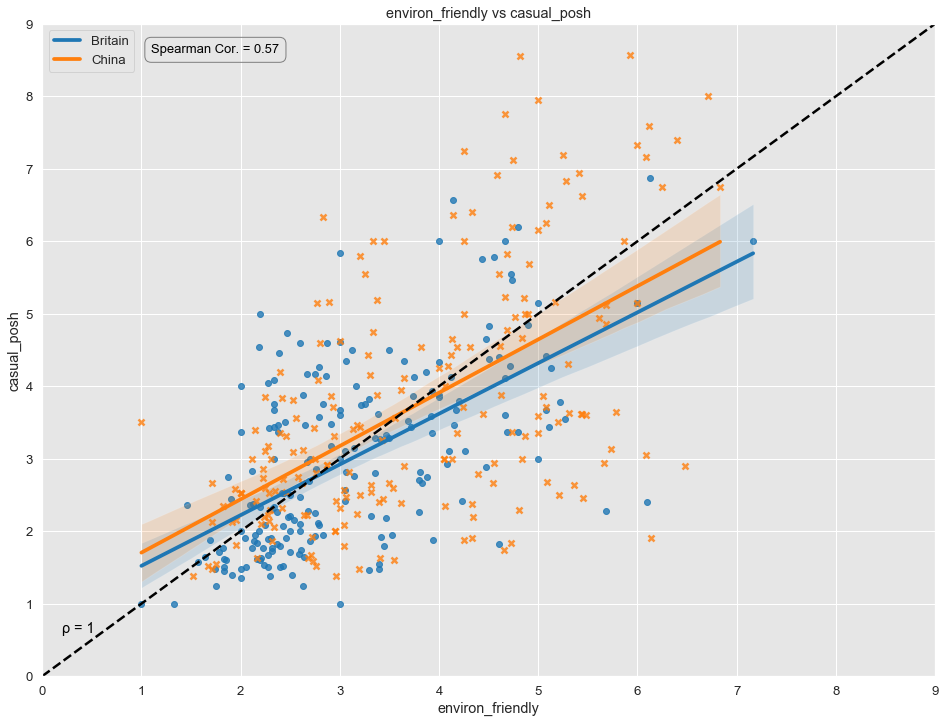

In [29]:
plt.figure(figsize=(16, 12))

eng_2d = np.vstack((eng_food_name_avg['environ_friendly'].values, eng_food_name_avg['casual_posh'].values)).T
chin_2d = np.vstack((chin_food_name_avg['environ_friendly'].values, chin_food_name_avg['casual_posh'].values)).T

rho, pval = spearmanr(eng_2d.ravel(), chin_2d.ravel())


ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['environ_friendly'], y=eng_food_name_avg['casual_posh'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['environ_friendly'], y=chin_food_name_avg['casual_posh'], marker='x')

ax_chin_food_name_avg_regplot.set_ylim([0, 9])
ax_chin_food_name_avg_regplot.set_xlim([0, 9])
ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("environ_friendly vs casual_posh")

plt.plot([0,100], [0,100], c='black', linestyle='--')
plt.annotate('ρ = 1', xy=(0.20, 0.60), color='black')

plt.gca()
plt.text(1.1, 8.6, 'Spearman Cor. = ' + str(round(rho, 2)), color='black', bbox=dict(facecolor='none', edgecolor='gray', 
        boxstyle='round, pad=.5'), fontsize=13)

#for i, txt in enumerate(norms):
#    plt.annotate(txt, (eng_food_name_avg['cheap_expensive'].values[i], eng_food_name_avg['environ_friendly'].values[i]))

#for i, txt in enumerate(norms):
#    plt.annotate(txt, (chin_food_name_avg['cheap_expensive'].values[i], chin_food_name_avg['environ_friendly'].values[i]))

0.8448282780950367 0.9194863973876733


Text(1.9, 8.6, 'Line ρ. = 0.65')

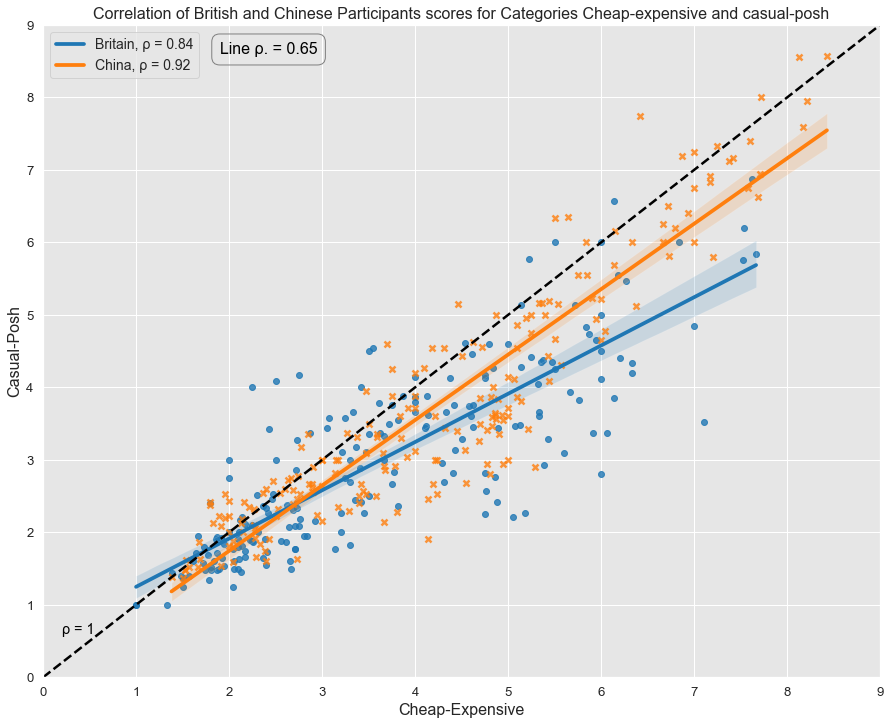

In [30]:
plt.figure(figsize=(15, 12))

eng_2d = np.vstack((eng_food_name_avg['cheap_expensive'].values, eng_food_name_avg['casual_posh'].values))
chin_2d = np.vstack((chin_food_name_avg['cheap_expensive'].values, chin_food_name_avg['casual_posh'].values))

rho, pval = spearmanr(eng_2d.T, chin_2d.T, axis=None) 

eng_rho, eng_pval = spearmanr(eng_food_name_avg['cheap_expensive'], eng_food_name_avg['casual_posh'])
chin_rho, chin_pval = spearmanr(chin_food_name_avg['cheap_expensive'], chin_food_name_avg['casual_posh'])

print(eng_rho, chin_rho)

ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['cheap_expensive'], y=eng_food_name_avg['casual_posh'])
ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['cheap_expensive'], y=chin_food_name_avg['casual_posh'], marker='x')

ax_chin_food_name_avg_regplot.set_ylim([0, 9])
ax_chin_food_name_avg_regplot.set_xlim([0, 9])

ax_chin_food_name_avg_regplot.set_xlabel("Cheap-Expensive", fontsize=16)
ax_chin_food_name_avg_regplot.set_ylabel("Casual-Posh", fontsize=16)

ax_chin_food_name_avg_regplot.legend(labels=['Britain, ρ = ' + str(round(eng_rho, 2)), 'China, ρ = ' + str(round(chin_rho, 2))], fontsize=14)
ax_chin_food_name_avg_regplot.set_title("Correlation of British and Chinese Participants scores for Categories Cheap-expensive and casual-posh", fontsize=16)

plt.plot([0,100], [0,100], c='black', linestyle='--')
plt.annotate('ρ = 1', xy=(0.20, 0.60), color='black')


plt.gca()
plt.text(1.9, 8.6, 'Line ρ. = ' + str(round(rho, 2)), color='black', bbox=dict(facecolor='none', edgecolor='gray', 
        boxstyle='round, pad=.5'), fontsize=16)

#for i, txt in enumerate(norms):
#    plt.annotate(txt, (eng_food_name_avg['cheap_expensive'].values[i], eng_food_name_avg['casual_posh'].values[i]))

#for i, txt in enumerate(norms):
#    plt.annotate(txt, (chin_food_name_avg['cheap_expensive'].values[i], chin_food_name_avg['casual_posh'].values[i]))

0.6671232437026879 0.7626608032627712


Text(0.5, 1.0, 'Environmentally_friendly_environmentally_unfriendly correlated to healthy-unhealthy')

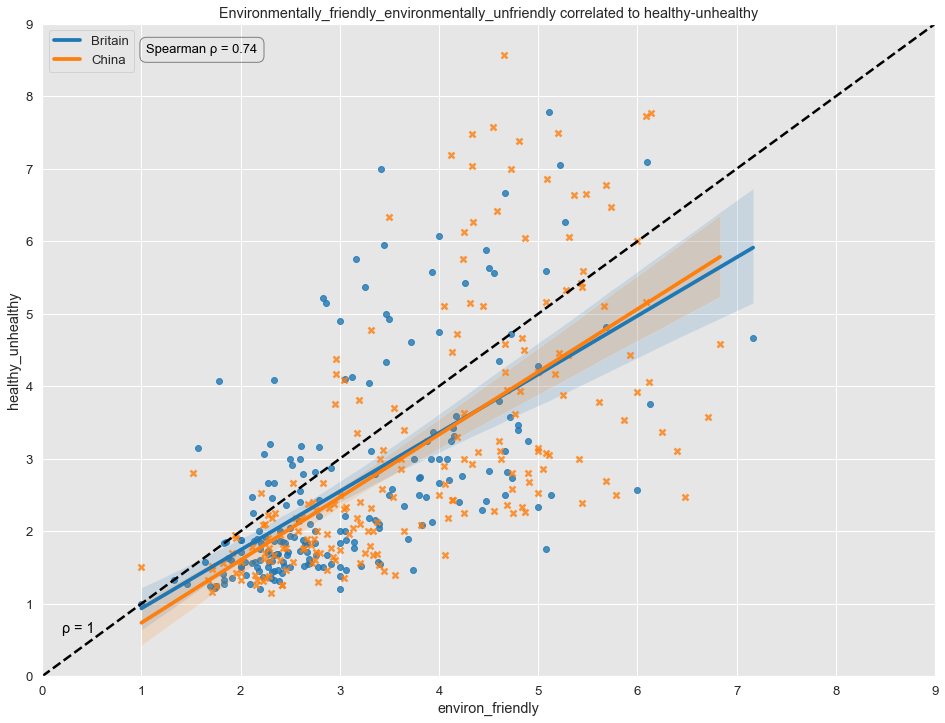

In [31]:
plt.figure(figsize=(16, 12))

ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['environ_friendly'], y=eng_food_name_avg['healthy_unhealthy'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['environ_friendly'], y=chin_food_name_avg['healthy_unhealthy'], marker='x')

eng_2d = np.vstack((eng_food_name_avg['environ_friendly'].values, eng_food_name_avg['healthy_unhealthy'].values)).T
chin_2d = np.vstack((chin_food_name_avg['environ_friendly'].values, chin_food_name_avg['healthy_unhealthy'].values)).T

rho, pval = spearmanr(eng_2d.T, chin_2d.T, axis=None) #, axis=None

eng_rho, eng_pval = spearmanr(eng_food_name_avg['environ_friendly'], eng_food_name_avg['healthy_unhealthy'])
chin_rho, chin_pval = spearmanr(chin_food_name_avg['environ_friendly'], chin_food_name_avg['healthy_unhealthy'])

print(eng_rho, chin_rho)

rho, pval = spearmanr(eng_2d.ravel(), chin_2d.ravel())
ax_chin_food_name_avg_regplot.set_ylim([0, 9])
ax_chin_food_name_avg_regplot.set_xlim([0, 9])

plt.plot([0,100], [0,100], c='black', linestyle='--')
plt.annotate('ρ = 1', xy=(0.20, 0.60), color='black')


plt.gca()
plt.text(1.05, 8.6, 'Spearman ρ = ' + str(round(rho, 2)), color='black', bbox=dict(facecolor='none', edgecolor='gray', 
        boxstyle='round, pad=.5'), fontsize=13)

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("Environmentally_friendly_environmentally_unfriendly correlated to healthy-unhealthy")

0.6597078875953432 0.6233785228778922


Text(0.5, 1.0, 'Environmentally_friendly_environmentally_unfriendly correlated to cheap_expensive')

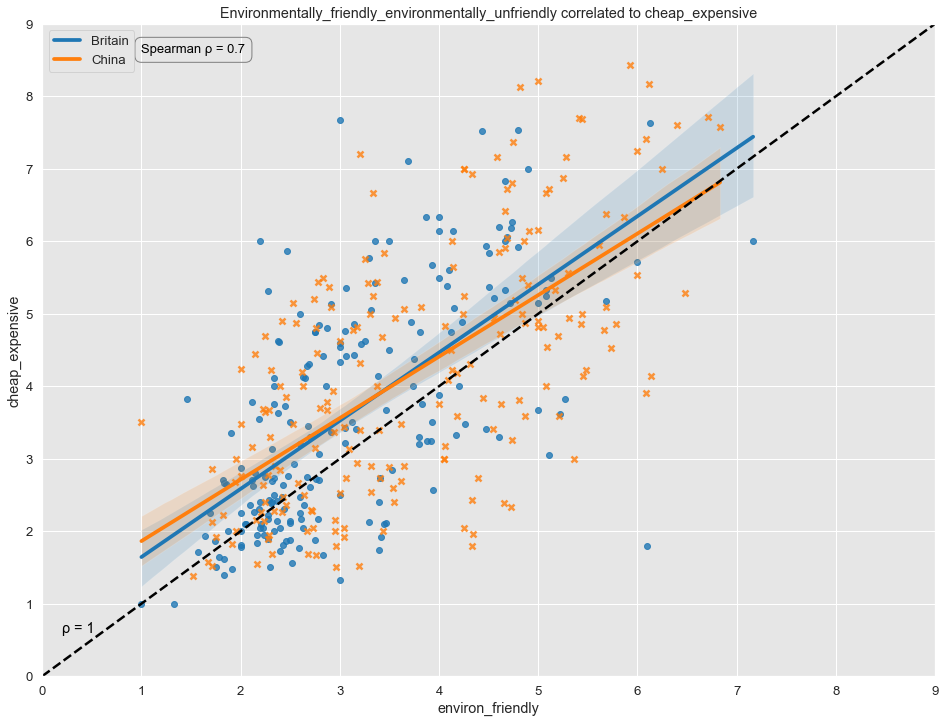

In [32]:
plt.figure(figsize=(16, 12))

ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['environ_friendly'], y=eng_food_name_avg['cheap_expensive'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['environ_friendly'], y=chin_food_name_avg['cheap_expensive'], marker='x')

eng_2d = np.vstack((eng_food_name_avg['environ_friendly'].values, eng_food_name_avg['cheap_expensive'].values)).T
chin_2d = np.vstack((chin_food_name_avg['environ_friendly'].values, chin_food_name_avg['cheap_expensive'].values)).T

rho, pval = spearmanr(eng_2d.T, chin_2d.T, axis=None) #, axis=None

eng_rho, eng_pval = spearmanr(eng_food_name_avg['environ_friendly'], eng_food_name_avg['cheap_expensive'])
chin_rho, chin_pval = spearmanr(chin_food_name_avg['environ_friendly'], chin_food_name_avg['cheap_expensive'])

print(eng_rho, chin_rho)

rho, pval = spearmanr(eng_2d.ravel(), chin_2d.ravel())
ax_chin_food_name_avg_regplot.set_ylim([0, 9])
ax_chin_food_name_avg_regplot.set_xlim([0, 9])

plt.plot([0,100], [0,100], c='black', linestyle='--')
plt.annotate('ρ = 1', xy=(0.20, 0.60), color='black')


plt.gca()
plt.text(1.0, 8.6, 'Spearman ρ = ' + str(round(rho, 2)), color='black', bbox=dict(facecolor='none', edgecolor='gray', 
        boxstyle='round, pad=.5'), fontsize=13)

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("Environmentally_friendly_environmentally_unfriendly correlated to cheap_expensive")

0.8004353538278303 0.5486375588787278


Text(0.5, 1.0, 'local-foreign correlated to casual-posh')

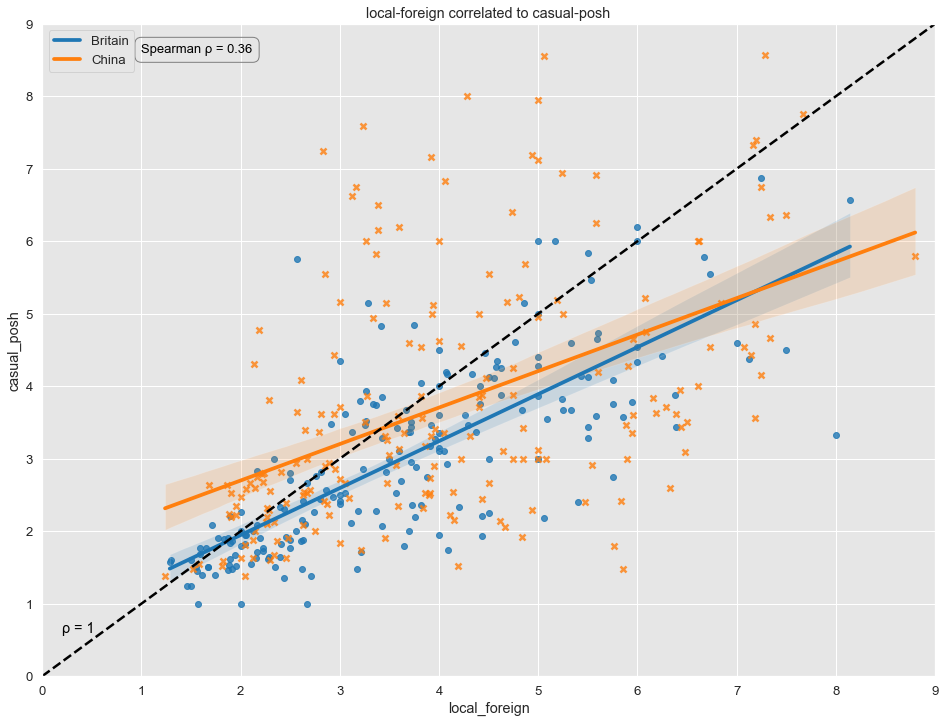

In [33]:
plt.figure(figsize=(16, 12))

ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['local_foreign'], y=eng_food_name_avg['casual_posh'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['local_foreign'], y=chin_food_name_avg['casual_posh'], marker='x')

eng_2d = np.vstack((eng_food_name_avg['local_foreign'].values, eng_food_name_avg['casual_posh'].values)).T
chin_2d = np.vstack((chin_food_name_avg['local_foreign'].values, chin_food_name_avg['casual_posh'].values)).T

rho, pval = spearmanr(eng_2d.T, chin_2d.T, axis=None) #, axis=None

eng_rho, eng_pval = spearmanr(eng_food_name_avg['local_foreign'], eng_food_name_avg['casual_posh'])
chin_rho, chin_pval = spearmanr(chin_food_name_avg['local_foreign'], chin_food_name_avg['casual_posh'])

print(eng_rho, chin_rho)

rho, pval = spearmanr(eng_2d.ravel(), chin_2d.ravel())
ax_chin_food_name_avg_regplot.set_ylim([0, 9])
ax_chin_food_name_avg_regplot.set_xlim([0, 9])

plt.plot([0,100], [0,100], c='black', linestyle='--')
plt.annotate('ρ = 1', xy=(0.20, 0.60), color='black')


plt.gca()
plt.text(1.0, 8.6, 'Spearman ρ = ' + str(round(rho, 2)), color='black', bbox=dict(facecolor='none', edgecolor='gray', 
        boxstyle='round, pad=.5'), fontsize=13)

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("local-foreign correlated to casual-posh")

Text(0.5, 1.0, 'Most frequent location vs local_traditional_foreign_not_traditional')

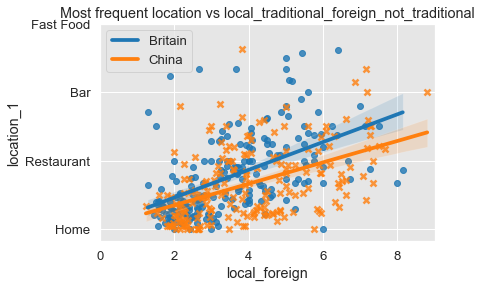

In [34]:
ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['local_foreign'], y=eng_food_name_avg['location_1'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['local_foreign'], y=chin_food_name_avg['location_1'], marker='x')

ax_chin_food_name_avg_regplot.set_xlim([0, 9])
ax_chin_food_name_avg_regplot.set_yticks([1,2,3,4])
ax_chin_food_name_avg_regplot.set_yticklabels(['Home', 'Restaurant', 'Bar', 'Fast Food'])

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("Most frequent location vs local_traditional_foreign_not_traditional")

Text(0.5, 1.0, 'Happiness-sadness vs most frequent location')

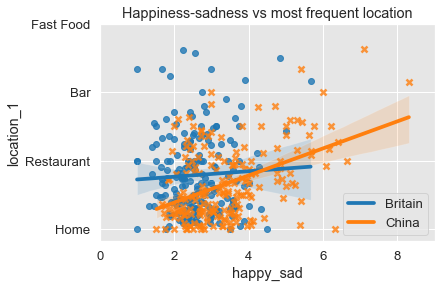

In [35]:
ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['happy_sad'], y=eng_food_name_avg['location_1'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['happy_sad'], y=chin_food_name_avg['location_1'], marker='x')

ax_chin_food_name_avg_regplot.set_xlim([0, 9])
ax_chin_food_name_avg_regplot.set_yticks([1,2,3,4])
ax_chin_food_name_avg_regplot.set_yticklabels(['Home', 'Restaurant', 'Bar', 'Fast Food'])

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("Happiness-sadness vs most frequent location")

Text(0.5, 1.0, 'Cheap-expensive vs most frequent location')

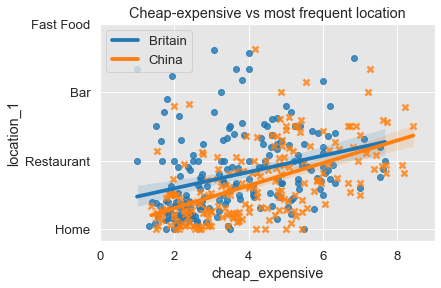

In [36]:
ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['cheap_expensive'], y=eng_food_name_avg['location_1'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['cheap_expensive'], y=chin_food_name_avg['location_1'], marker='x')

ax_chin_food_name_avg_regplot.set_xlim([0, 9])
ax_chin_food_name_avg_regplot.set_yticks([1,2,3,4])
ax_chin_food_name_avg_regplot.set_yticklabels(['Home', 'Restaurant', 'Bar', 'Fast Food'])

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("Cheap-expensive vs most frequent location")

Text(0.5, 1.0, 'Casual/Simple-Posh/Elegant vs most frequent location')

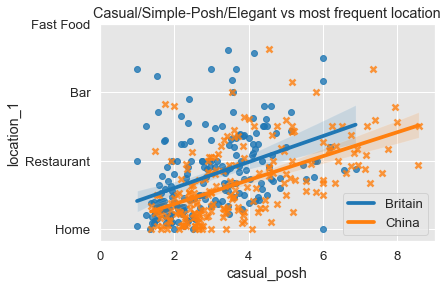

In [37]:
ax_eng_food_name_avg_regplot = sns.regplot(x=eng_food_name_avg['casual_posh'], y=eng_food_name_avg['location_1'])

ax_chin_food_name_avg_regplot = sns.regplot(x=chin_food_name_avg['casual_posh'], y=chin_food_name_avg['location_1'], marker='x')

ax_chin_food_name_avg_regplot.set_xlim([0, 9])
ax_chin_food_name_avg_regplot.set_yticks([1,2,3,4])
ax_chin_food_name_avg_regplot.set_yticklabels(['Home', 'Restaurant', 'Bar', 'Fast Food'])

ax_chin_food_name_avg_regplot.legend(labels=['Britain','China'])
ax_chin_food_name_avg_regplot.set_title("Casual/Simple-Posh/Elegant vs most frequent location")